In [1]:
#Importing Libraries

# data visualisation and manipulation
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
sns.set(style='whitegrid')

#import the necessary modelling algos
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB


#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,log_loss,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

#preprocess.
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder,OneHotEncoder

In [2]:
#importing Dataset

df = pd.read_csv("attrition.csv")
df.shape

(2940, 29)

In [3]:
#Dropping Duplicate records

df.drop_duplicates(inplace = True)
df.shape

(1470, 29)

In [20]:
#Check for null values

df.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
dtype: int64

In [21]:
#information about datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 29 columns):
Age                         1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
NumCompaniesWorked          1470 non-null int64
OverTime                    1470 non-null object
PercentSalaryHike           1470 non-null int64
PerformanceRating     

In [22]:
df.head()

Age     BusinessTravel  DailyRate Department  DistanceFromHome  \
0   41      Travel_Rarely       1102      Sales                 1   
1   49  Travel_Frequently        279      RandD                 8   
2   37      Travel_Rarely       1373      RandD                 2   
3   33  Travel_Frequently       1392      RandD                 3   
4   27      Travel_Rarely        591      RandD                 2   

  EducationField  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  \
0        Life_SC                        2  Female          94               3   
1        Life_SC                        3    Male          61               2   
2          Other                        4    Male          92               2   
3        Life_SC                        4  Female          56               3   
4        Medical                        1    Male          40               3   

   ...  RelationshipSatisfaction StockOptionLevel  TotalWorkingYears  \
0  ...                         1                0                  8   
1  ...                         4                1                 10   
2  ...                         2                0                  7   
3  ...                         3                0                  8   
4  ...                         4                1                  6   

  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                     0                1               6                  4   
1                     3                3              10                  7   
2                     3                3               0                  0   
3                     3                3               8                  7   
4                     3                3               2                  2   

   YearsSinceLastPromotion  YearsWithCurrManager  Attrition  
0                        0                     5          1  
1                        1                     7          0  
2                        0                     0          1  
3                        3                     0          0  
4                        2                     2          0  

[5 rows x 29 columns]

In [7]:
print('Mean is %2.1f Sd is %2.1f' % (df.HourlyRate.mean(),np.std(df.HourlyRate,ddof = 1)))

Mean is 65.9 Sd is 20.3


## EDA

In [23]:
#sns.pairplot(df,hue='Attrition')

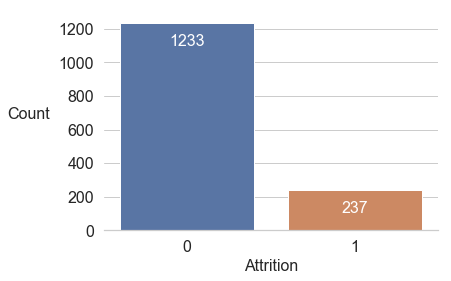

In [24]:
#Attrition

"""Plot the target variable to make it easier to visualise. """
plt.figure(figsize=(6,4))
fig = sns.countplot(df.Attrition)
sns.despine(left=True)
fig.set_xlabel('Attrition', fontsize=16)
plt.xticks(fontsize=16)
fig.set_ylabel('Count', fontsize=16, rotation=0)
fig.yaxis.labelpad = 30
plt.yticks(fontsize=16)
#Annot
for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:}'.format(p.get_height()), (x.mean(), y-150), ha='center', va='bottom', fontsize=16, color='white')
plt.show()

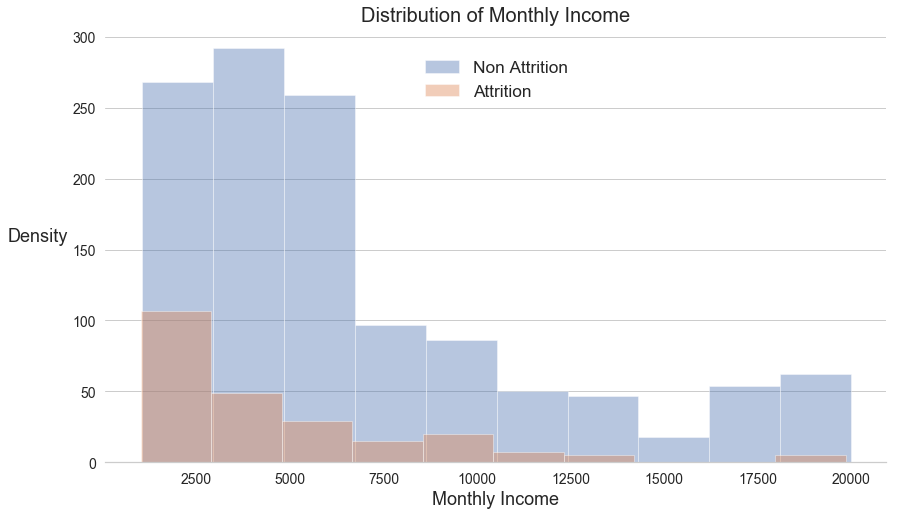

Average Monthly Income: 6502.931292517007


In [25]:
#Distibution of Attrition based on Salary

plt.figure(figsize=(14,8))
fig = sns.distplot(df[df['Attrition'] == 0]['MonthlyIncome'], label='Non Attrition', kde=0, bins=10)
sns.distplot(df[df['Attrition'] == 1]['MonthlyIncome'], label='Attrition', kde=0, bins=10)
sns.despine(left=1)
fig.grid(axis='x')
plt.xlabel('Monthly Income',fontsize=18)
plt.ylabel('Density',fontsize=18, rotation=0)
fig.yaxis.labelpad = 30
plt.title('Distribution of Monthly Income',fontsize=20);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.yaxis.labelpad = 35
plt.legend(fontsize='x-large', bbox_to_anchor=(0.4, 0.94), loc=2, borderaxespad=0., frameon=0)
plt.show()
print('Average Monthly Income:',df.MonthlyIncome.mean())

Average Monthly Income for Males: 6380.507936507936
Average Monthly Income for Females: 6686.566326530612


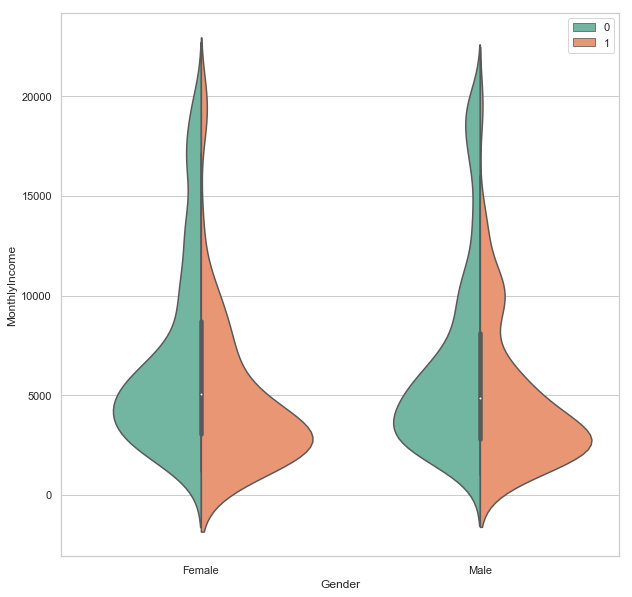

In [26]:
#Based on average_income how attrition differs from male and female

print('Average Monthly Income for Males:',df[df.Gender == 'Male']['MonthlyIncome'].mean())
print('Average Monthly Income for Females:',df[df.Gender == 'Female']['MonthlyIncome'].mean())


fig,ax = plt.subplots(figsize=(10,10))
sns.violinplot(x = 'Gender',y = 'MonthlyIncome',data=df, hue='Attrition',split=True,palette='Set2')
plt.legend(loc='best')
plt.show()

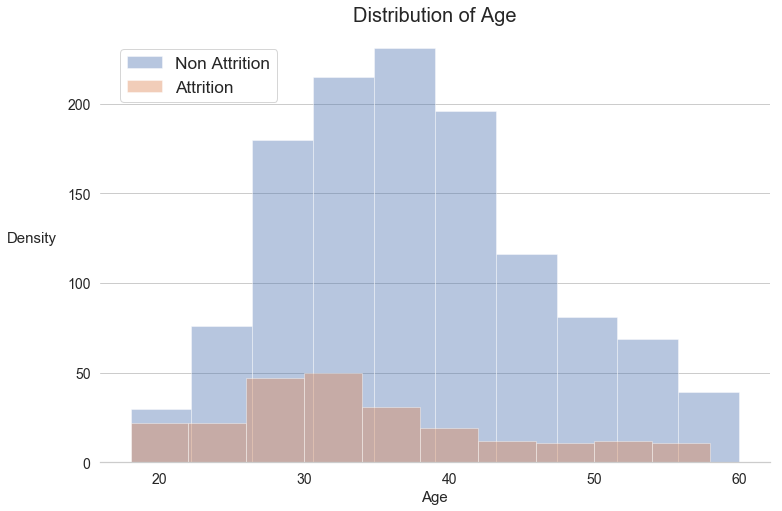

In [27]:
#Attrition Based of Age Groups

# Lets look into the Age feature in more detail in relation to the target variable.
""" Plot the distribution of Age where attrition is true and false. """
plt.figure(figsize=(12,8))
fig = sns.distplot(df[df['Attrition'] == 0]['Age'], label='Non Attrition', kde=0, bins=10)
sns.distplot(df[df['Attrition'] == 1]['Age'], label='Attrition', kde=0, bins=10)

sns.despine(left=1)

fig.grid(axis='x')

plt.xlabel('Age',fontsize=15)
plt.ylabel('Density',fontsize=15, rotation=0)
fig.yaxis.labelpad = 30
plt.title('Distribution of Age',fontsize=20);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.yaxis.labelpad = 35
plt.legend(fontsize='x-large', bbox_to_anchor=(0.03, 0.95), loc=2, borderaxespad=0., frameon=1)
plt.show()

* From this graph, we can see that attrition is present across all the age ranges.

* However, for some age groups, attrition is much more prevalent. This is especially true in the early 20s age group where it is almost equal.

* Attrition seems to be at its lowest in the mid 40s, and steadily increases as it gets closer the retirement age

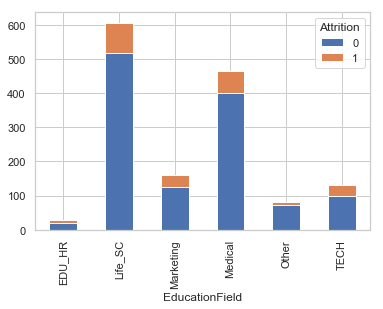

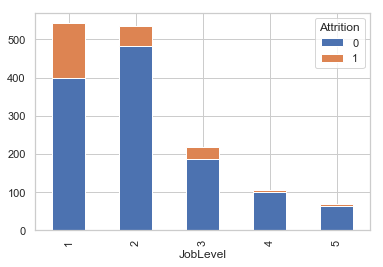

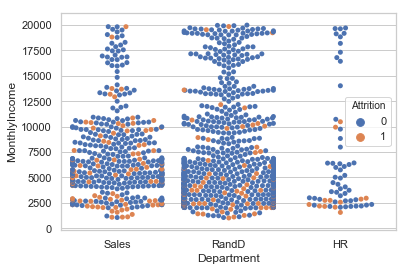

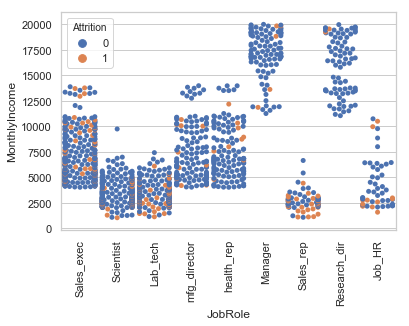

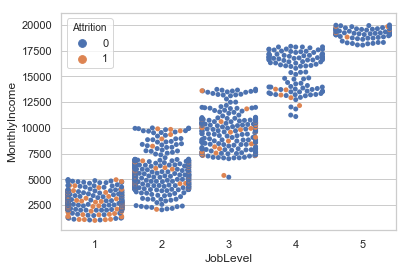

In [28]:
#attrition based on joblevel,title,and department with respect to Monthly income

pd.crosstab(df.EducationField,df.Attrition).plot(kind='bar',stacked = True)
plt.show()

pd.crosstab(df.JobLevel,df.Attrition).plot(kind='bar',stacked = True)
plt.show()

sns.swarmplot(x="Department", y="MonthlyIncome", hue="Attrition", data=df);
plt.show()

sns.swarmplot(x="JobRole", y="MonthlyIncome", hue="Attrition", data=df);
plt.xticks( rotation=90 )
plt.show()

sns.swarmplot(x="JobLevel", y="MonthlyIncome", hue="Attrition", data=df);
plt.show()

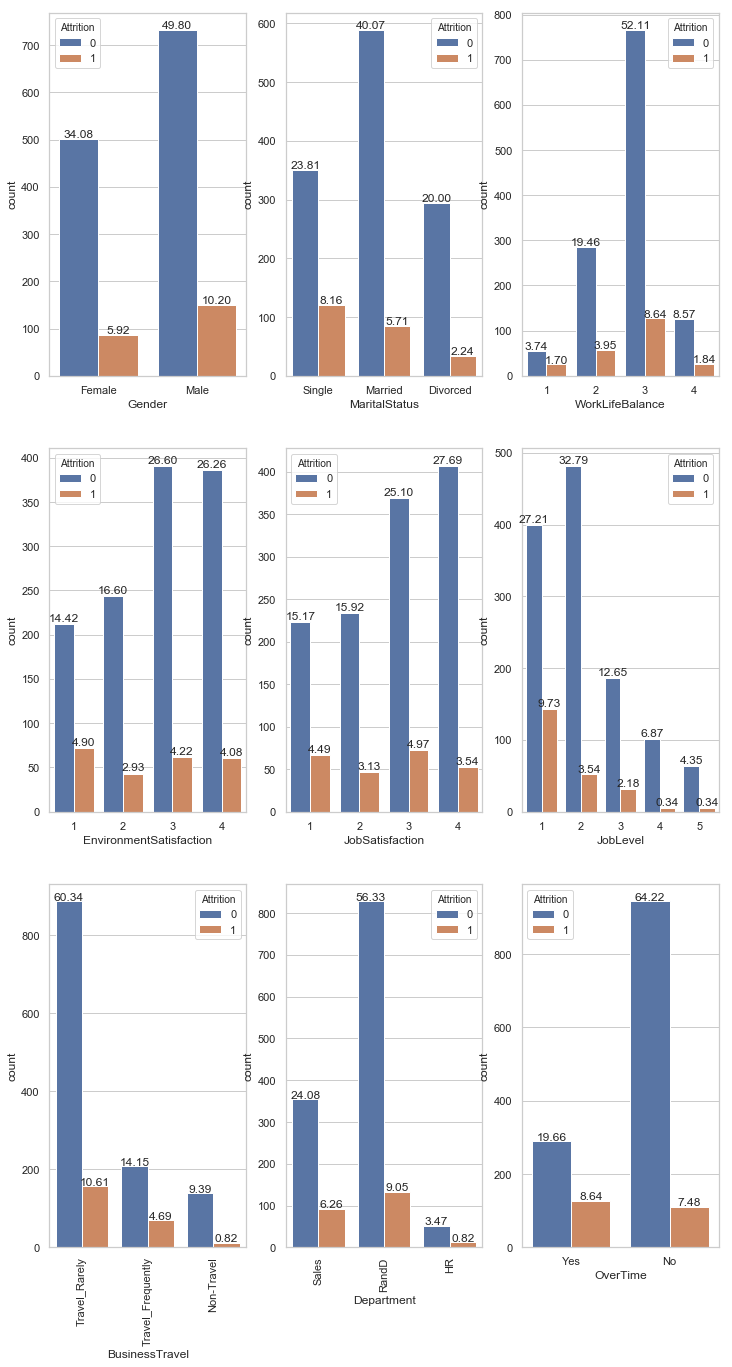

In [29]:
# Attrition Wise
total_records= len(df)
columns = ["Gender","MaritalStatus","WorkLifeBalance","EnvironmentSatisfaction","JobSatisfaction",
           "JobLevel","BusinessTravel","Department",'OverTime']
plt.figure(figsize=(12,8))
j=0
for i in columns:
    j +=1
    plt.subplot(4,3,j)
    #sns.countplot(hrdata[i])
    ax1 = sns.countplot(data=df,x= i,hue="Attrition")
    if(j==8 or j== 7):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height*100/total_records,0),
                ha="center",rotation=0) 

# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2)
plt.show()

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


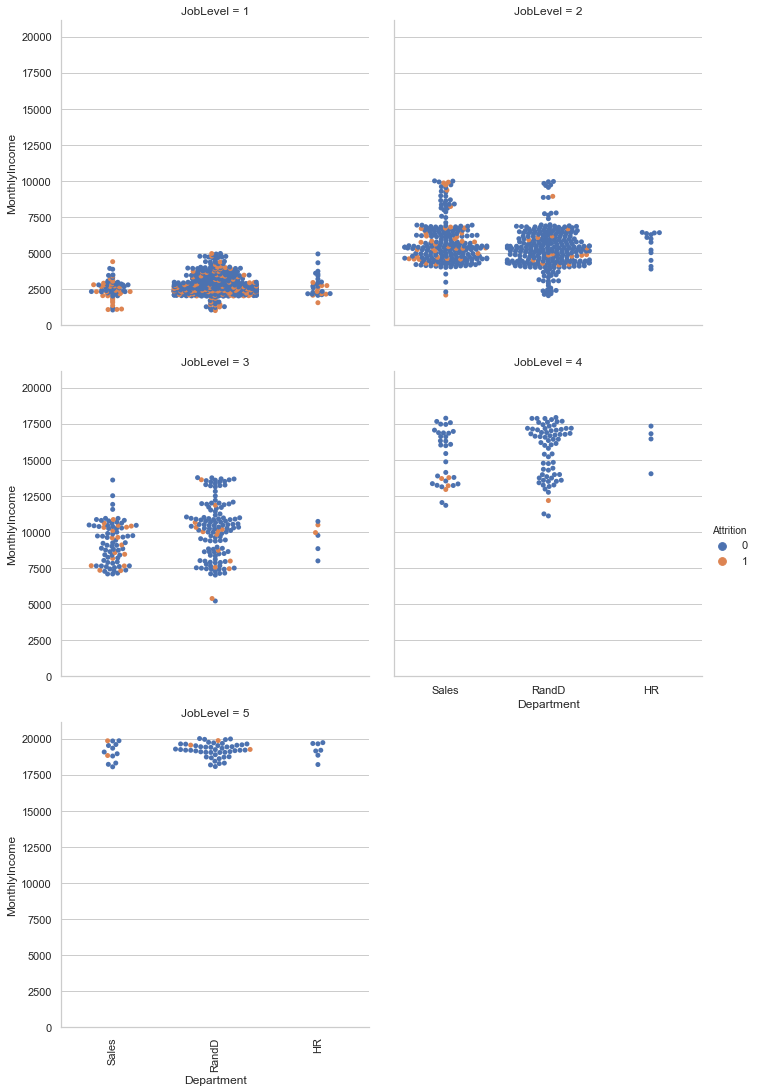

In [30]:
#attrition on deprtment with respect to the job_levels

sns.factorplot(x =   'Department',y ='MonthlyIncome',hue = 'Attrition',col = 'JobLevel',col_wrap=2,kind = 'swarm',data = df)
plt.xticks( rotation=90 )
plt.show()

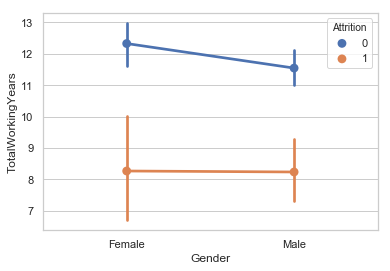

In [31]:
#attrition based on Working years

sns.pointplot(x="Gender", y="TotalWorkingYears", hue="Attrition", data=df)
plt.show()

* Males and Females within the ranges for 'TotalWorkingYears' of 11 to 13 are less likely to quit

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


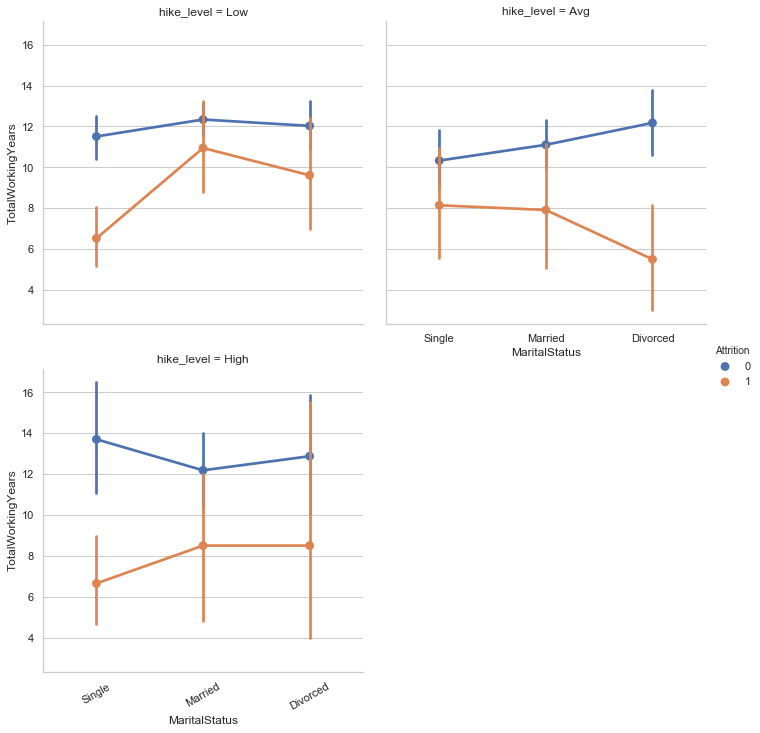

In [16]:
df['hike_level'] = pd.cut(df['PercentSalaryHike'], 3, labels=['Low', 'Avg', 'High'])
sns.factorplot(x ='MaritalStatus',y ='TotalWorkingYears',hue = 'Attrition',col = 'hike_level',col_wrap=2, data = df)
plt.xticks( rotation=30)
plt.show()

* The salary hike affects married more when the monthly income is around 6k.
* But when the hike level is avg single are tending more towards switching. 
* When hike level is high everyone seems to be happy and less attrition.

In [32]:
#corelation of attrition

df[df.columns[1:]].corr()['Attrition'][:]

DailyRate                  -0.056652
DistanceFromHome            0.077924
EnvironmentSatisfaction    -0.103369
HourlyRate                 -0.006846
JobInvolvement             -0.130016
JobLevel                   -0.169105
JobSatisfaction            -0.103481
MonthlyIncome              -0.159840
NumCompaniesWorked          0.043494
PercentSalaryHike          -0.013478
PerformanceRating           0.002889
RelationshipSatisfaction   -0.045872
StockOptionLevel           -0.137145
TotalWorkingYears          -0.171063
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
YearsAtCompany             -0.134392
YearsInCurrentRole         -0.160545
YearsSinceLastPromotion    -0.033019
YearsWithCurrManager       -0.156199
Attrition                   1.000000
Name: Attrition, dtype: float64

## Data split

In [33]:
df = df.drop(columns=['DailyRate','HourlyRate',
                      'JobInvolvement','YearsInCurrentRole',
                      'YearsAtCompany',
                      'NumCompaniesWorked'])

In [34]:
 #Encode labels in column 


df['BusinessTravel'] = LabelEncoder().fit_transform(df['BusinessTravel']) 
df.Department = LabelEncoder().fit_transform(df.Department)
df.EducationField = LabelEncoder().fit_transform(df.EducationField)
df.Gender = LabelEncoder().fit_transform(df.Gender)
df.JobRole = LabelEncoder().fit_transform(df.JobRole)
df.MaritalStatus = LabelEncoder().fit_transform(df.MaritalStatus)
df.OverTime = LabelEncoder().fit_transform(df.OverTime)

In [35]:
df.BusinessTravel = df.BusinessTravel.astype('category')
df.Department  = df.Department.astype('category')
df.EducationField = df.EducationField.astype('category')
df.EnvironmentSatisfaction = df.EnvironmentSatisfaction.astype('category')
df.Gender = df.Gender.astype('category')
df.JobLevel = df.JobLevel.astype('category')
df.JobRole = df.JobRole.astype('category')
df.JobSatisfaction = df.JobSatisfaction.astype('category')
df.MaritalStatus = df.MaritalStatus.astype('category')
df.OverTime = df.OverTime.astype('category')
df.RelationshipSatisfaction = df.RelationshipSatisfaction.astype('category')
df.StockOptionLevel = df.StockOptionLevel.astype('category')
df.TrainingTimesLastYear = df.TrainingTimesLastYear.astype('category')
df.WorkLifeBalance = df.WorkLifeBalance.astype('category')
#df.YearsSinceLastPromotion = df.YearsSinceLastPromotion.astype('category')
#df.YearsWithCurrManager = df.YearsWithCurrManager.astype('category')
df.Attrition = df.Attrition.astype('category')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 23 columns):
Age                         1470 non-null int64
BusinessTravel              1470 non-null category
Department                  1470 non-null category
DistanceFromHome            1470 non-null int64
EducationField              1470 non-null category
EnvironmentSatisfaction     1470 non-null category
Gender                      1470 non-null category
JobLevel                    1470 non-null category
JobRole                     1470 non-null category
JobSatisfaction             1470 non-null category
MaritalStatus               1470 non-null category
MonthlyIncome               1470 non-null int64
OverTime                    1470 non-null category
PercentSalaryHike           1470 non-null int64
PerformanceRating           1470 non-null int64
RelationshipSatisfaction    1470 non-null category
StockOptionLevel            1470 non-null category
TotalWorkingYears           1470 non-null

In [37]:
X = df.drop('Attrition', axis=1)
y = df.Attrition


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1176, 22)
(294, 22)
(1176,)
(294,)


In [38]:
# Base Line Accuracy
y.value_counts(normalize=True)*100

0    83.877551
1    16.122449
Name: Attrition, dtype: float64

In [39]:
# Packages
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [40]:
# Models Used
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(criterion='gini'),
    DecisionTreeClassifier(criterion='entropy'),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    BernoulliNB(),
    MLPClassifier()
]
    
""" Logging for visual comparison. """ 

log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

""" Iterate through each classification model stated above, fitting the model to the train data and finally
    printing the accuracy and log loss of each model. """

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

LogisticRegression
****Results****
Accuracy: 88.7755%
Log Loss: 0.3053067680882486


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


KNeighborsClassifier
****Results****
Accuracy: 80.2721%
Log Loss: 3.0417025297688287
SVC
****Results****
Accuracy: 85.3741%
Log Loss: 0.41852846443956065
DecisionTreeClassifier
****Results****
Accuracy: 79.9320%
Log Loss: 6.931251045237179
DecisionTreeClassifier
****Results****
Accuracy: 80.2721%
Log Loss: 6.813772213961972
RandomForestClassifier
****Results****
Accuracy: 87.0748%
Log Loss: 0.658801136214253


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoostClassifier
****Results****
Accuracy: 88.0952%
Log Loss: 0.6635586517157535
GradientBoostingClassifier
****Results****
Accuracy: 88.7755%
Log Loss: 0.3139375285191662
GaussianNB
****Results****
Accuracy: 83.6735%
Log Loss: 0.41302845562992885
BernoulliNB
****Results****
Accuracy: 86.3946%
Log Loss: 0.3600782772296504
MLPClassifier
****Results****
Accuracy: 85.3741%
Log Loss: 2.1701421109301466


In [41]:
log1 = log.sort_values(by='Accuracy',ascending=False)

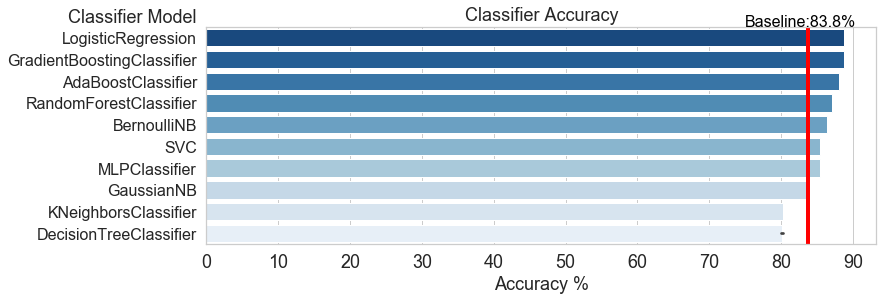

In [42]:
plt.figure(figsize=(12,4))
fig = sns.barplot(x='Accuracy', y='Classifier', data=log1,palette=sns.color_palette("Blues_r", n_colors=len('classifier')))
plt.xlabel('Accuracy %', fontsize=18)
plt.ylabel('Classifier Model',fontsize=18, position=(0,1),rotation=0)
fig.yaxis.labelpad= -125
fig.set_xticks(ticks=[0,10,20,30,40,50,60,70,80,90])
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Classifier Accuracy', fontsize=18)
plt.axvline(83.8, 0,1, lw=4, color='red')
plt.annotate(s='Baseline:83.8%', xy=(75,-0.5), fontsize=16, color='black')
plt.show()

## Decision Tree

In [43]:
#model_GINI

model_gini=DecisionTreeClassifier()

model_gini.fit(X_train, y_train)

preds_gini = model_gini.predict(X_test)

mat_gini = confusion_matrix(y_test,preds_gini)
print(mat_gini)

print('\n')

#Calculate accuracy
print(accuracy_score(y_test,preds_gini))

[[221  30]
 [ 30  13]]


0.7959183673469388


In [44]:
#ENTOPY

model_entropy=DecisionTreeClassifier(criterion='entropy')

model_entropy.fit(X_train, y_train)

preds_entropy = model_entropy.predict(X_test)
#preds_entropy_train = model_entropy.predict(X_train)

#Confusion matrix
mat_gini = confusion_matrix(y_test,preds_entropy)
print(mat_gini)

print("\n")

print(accuracy_score(y_test,preds_entropy))

[[221  30]
 [ 34   9]]


0.782312925170068


## Naive Bayes

In [45]:
#Gaussian model

classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred_g = classifier.predict(X_test)


cm_g = confusion_matrix(y_test, y_pred_g)
print(cm_g)

print("\n")

print("for Gaussian",accuracy_score(y_test, y_pred_g))

[[226  25]
 [ 23  20]]


for Gaussian 0.8367346938775511


In [46]:
#bernoulli model

from sklearn.naive_bayes import BernoulliNB

optimal_alpha = 1
NB_optimal = BernoulliNB(alpha=optimal_alpha)

# fitting the model
NB_optimal.fit(X_train, y_train)

#prediction
y_pred_b = NB_optimal.predict(X_test)
y_pred_b

cm_b = confusion_matrix(y_test, y_pred_b)
print(cm_b)

print("\n")

print("for Bernaulli",accuracy_score(y_test, y_pred_b))

[[246   5]
 [ 35   8]]


for Bernaulli 0.8639455782312925


## Decision tree model building based on GINI

In [47]:
preds_gini_train = model_gini.predict(X_train)
print(accuracy_score(y_train,preds_gini_train))

1.0


In [48]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

In [49]:
feature_cols = X.columns

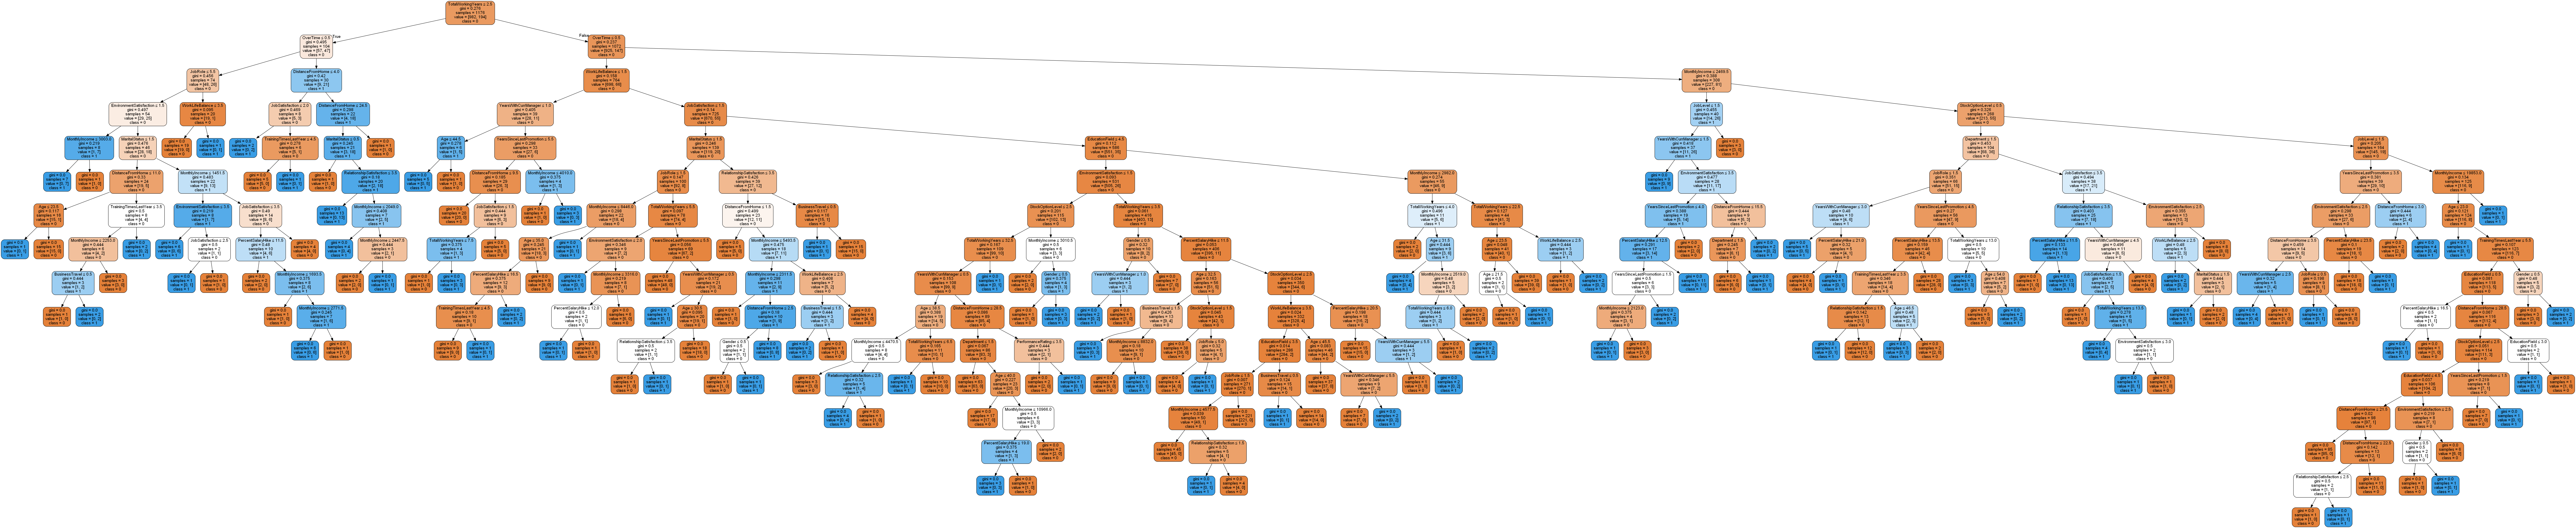

In [50]:
dot_data = StringIO()
export_graphviz(model_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [51]:
#Pruning

clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=5, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

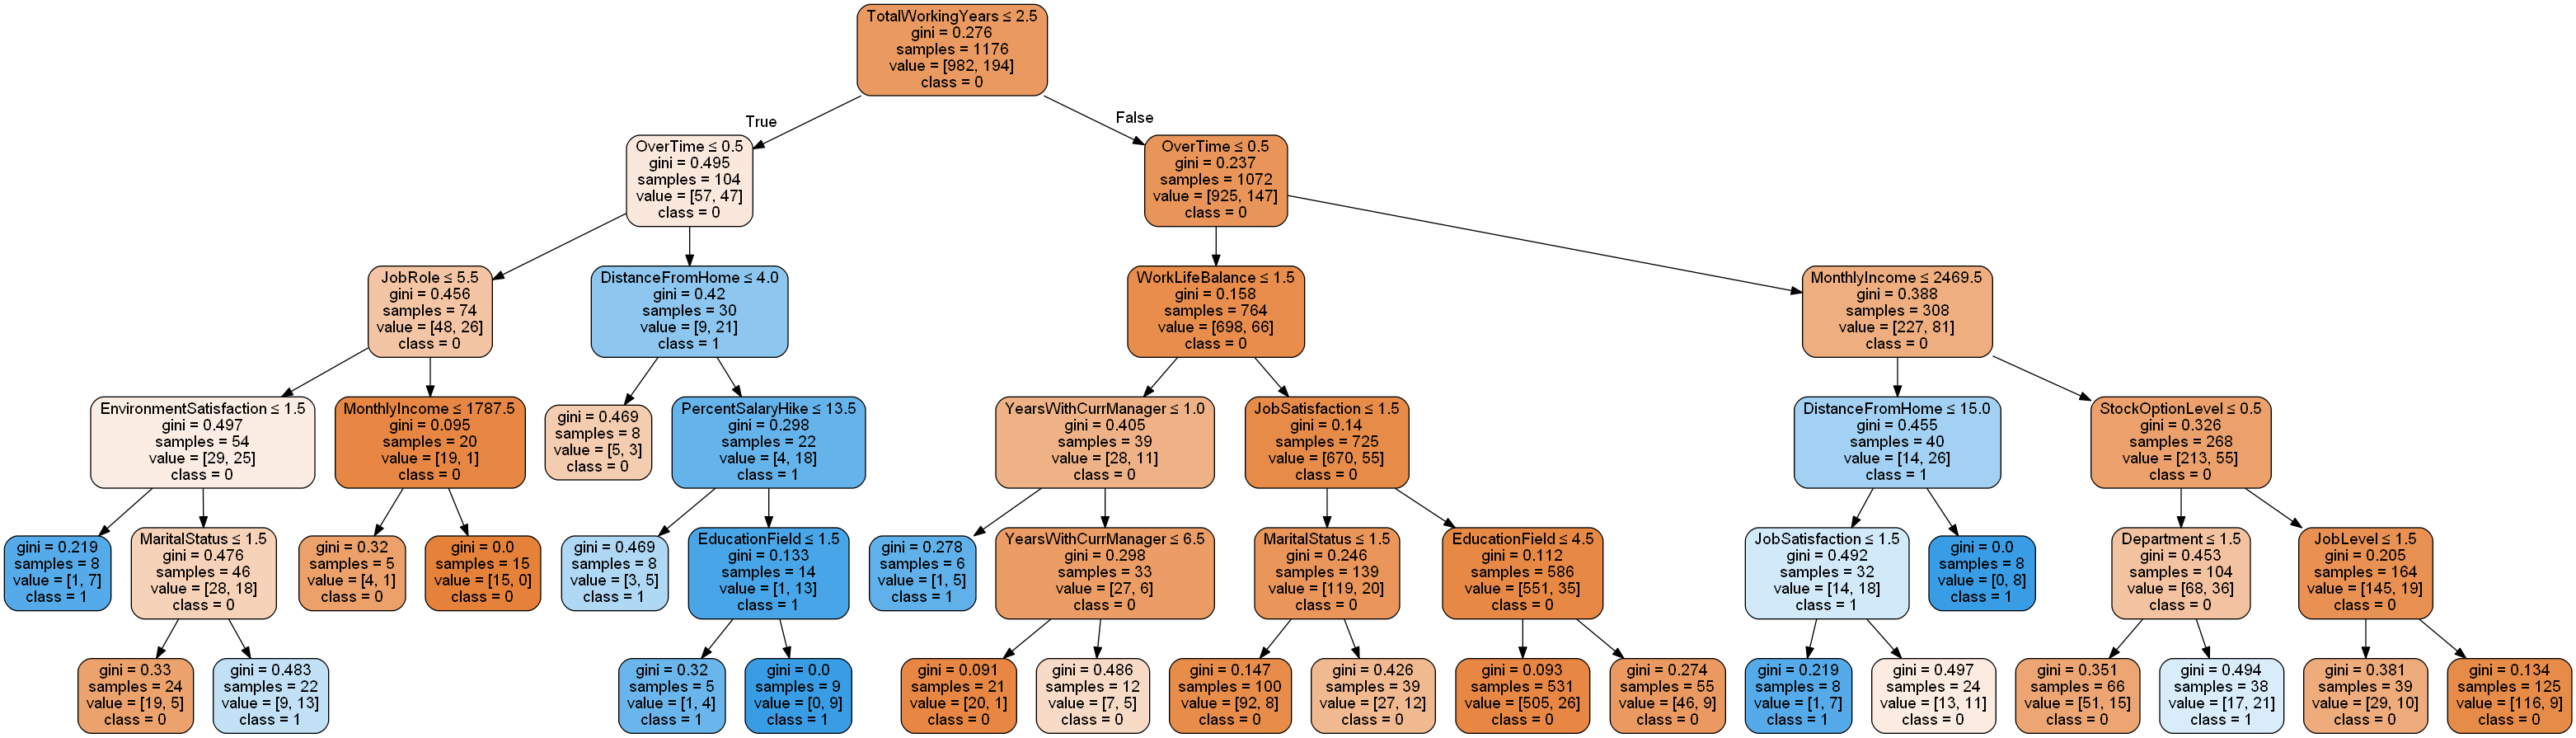

In [52]:
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

In [53]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

#Confusion matrix
mat_pruned = confusion_matrix(y_test,preds_pruned)

print("confusion matrix = \n",mat_pruned)

print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))

confusion matrix = 
 [[243   8]
 [ 30  13]]
0.8707482993197279
0.8741496598639455


In [54]:
feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)
print("feat importance = " + str(feat_importance))

feat importance = [0.         0.         0.00434152 0.00404298 0.00133321 0.00271157
 0.         0.00171919 0.00423289 0.00312482 0.00533098 0.01196491
 0.01605548 0.00079788 0.         0.         0.00574055 0.01597727
 0.         0.00267586 0.         0.00543377]


In [55]:
feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False).head(10)

0
OverTime              0.187821
TotalWorkingYears     0.186906
MonthlyIncome         0.139968
StockOptionLevel      0.067154
YearsWithCurrManager  0.063566
MaritalStatus         0.062363
Department            0.050788
JobRole               0.049517
DistanceFromHome      0.047296
JobSatisfaction       0.036555

In [56]:
# print the first 10 predicted probabilities 
clf_pruned.predict_proba(X_test)[0:10]


array([[0.95103578, 0.04896422],
       [0.77272727, 0.22727273],
       [0.625     , 0.375     ],
       [0.69230769, 0.30769231],
       [0.92      , 0.08      ],
       [0.44736842, 0.55263158],
       [0.95103578, 0.04896422],
       [0.95103578, 0.04896422],
       [0.95103578, 0.04896422],
       [0.95103578, 0.04896422]])

In [57]:
# store the predicted probabilities for class Attrition

y_pred_prob = clf_pruned.predict_proba(X_test)[:, 1]
y_pred_prob[1:20]

array([0.22727273, 0.375     , 0.30769231, 0.08      , 0.55263158,
       0.04896422, 0.04896422, 0.04896422, 0.04896422, 0.04896422,
       0.04896422, 0.04761905, 0.55263158, 0.04896422, 0.04896422,
       0.45833333, 0.04896422, 0.04896422, 0.04896422])

Text(0, 0.5, 'Frequency')

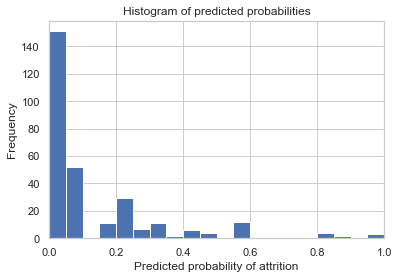

In [58]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=20)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of attrition')
plt.ylabel('Frequency')

In [59]:
## Changing the cut off value for prediction


pred_proba_df = pd.DataFrame(clf_pruned.predict_proba(X_test))
threshold_list = [0.01,0.025,0.05,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.2,0.25,0.3,0.32,0.33,0.40,0.45,0.5,0.6,.7,.8,.9,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = metrics.accuracy_score(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1))
    print('Our testing accuracy is {:.2f}'.format(test_accuracy))

    print(confusion_matrix(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1)))


******** For i = 0.01 ******
Our testing accuracy is 0.16
[[  4 247]
 [  1  42]]

******** For i = 0.025 ******
Our testing accuracy is 0.16
[[  4 247]
 [  1  42]]

******** For i = 0.05 ******
Our testing accuracy is 0.59
[[140 111]
 [ 11  32]]

******** For i = 0.08 ******
Our testing accuracy is 0.72
[[186  65]
 [ 17  26]]

******** For i = 0.09 ******
Our testing accuracy is 0.72
[[186  65]
 [ 17  26]]

******** For i = 0.1 ******
Our testing accuracy is 0.72
[[186  65]
 [ 17  26]]

******** For i = 0.11 ******
Our testing accuracy is 0.72
[[186  65]
 [ 17  26]]

******** For i = 0.12 ******
Our testing accuracy is 0.72
[[186  65]
 [ 17  26]]

******** For i = 0.13 ******
Our testing accuracy is 0.72
[[186  65]
 [ 17  26]]

******** For i = 0.14 ******
Our testing accuracy is 0.72
[[186  65]
 [ 17  26]]

******** For i = 0.15 ******
Our testing accuracy is 0.72
[[186  65]
 [ 17  26]]

******** For i = 0.2 ******
Our testing accuracy is 0.77
[[200  51]
 [ 17  26]]

******** For i =

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [60]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12

In [61]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix


In [62]:
clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [3, 4, 5,6,7,8],
    }

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [63]:
#grid_search

def grid_search_wrapper(refit_score='recall_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # make the predictions
    y_pred = grid_search.predict(X_test)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [64]:
grid_search_clf = grid_search_wrapper(refit_score='recall_score')

Best params for recall_score
{'max_depth': 7}

Confusion matrix of optimized for recall_score on the test data:
     pred_neg  pred_pos
neg       232        19
pos        32        11


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [65]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_recall_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score', 'param_max_depth']].round(3)

mean_test_precision_score  mean_test_recall_score  \
4                      0.461                   0.310   
5                      0.445                   0.290   
3                      0.472                   0.278   
2                      0.486                   0.263   
1                      0.450                   0.196   
0                      0.393                   0.154   

   mean_test_accuracy_score param_max_depth  
4                     0.824               7  
5                     0.813               8  
3                     0.827               6  
2                     0.834               5  
1                     0.830               4  
0                     0.831               3

In [66]:
y_scores = grid_search_clf.predict_proba(X_test)[:, 1]

In [67]:
p, r, thresholds = precision_recall_curve(y_test, y_scores)

In [68]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds,t):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    

In [69]:
precision_recall_threshold(p, r, thresholds, 0.2)

     pred_neg  pred_pos
neg       213        38
pos        27        16


In [70]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

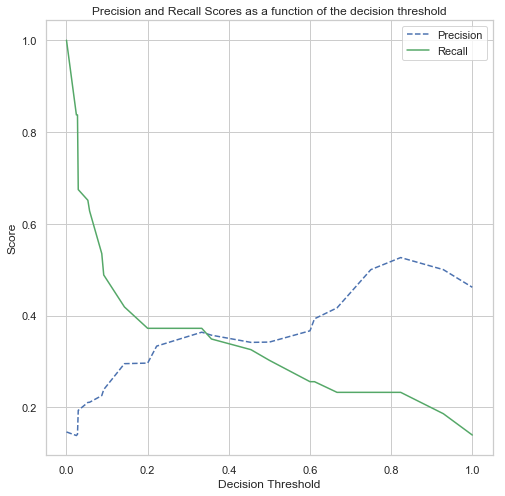

In [71]:
plot_precision_recall_vs_threshold(p, r, thresholds)

## Naive Bayes : Gaussianmodel

In [72]:
#Gaussian model

classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred_g = classifier.predict(X_test)


cm_g = confusion_matrix(y_test, y_pred_g)
cm_g

array([[226,  25],
       [ 23,  20]], dtype=int64)

In [73]:
topn_class_for_attrition = sorted(zip(NB_optimal.feature_count_[1], X.columns),reverse=True)[:12]
topn_class_for_attrition

[(194.0, 'WorkLifeBalance'),
 (194.0, 'RelationshipSatisfaction'),
 (194.0, 'PerformanceRating'),
 (194.0, 'PercentSalaryHike'),
 (194.0, 'MonthlyIncome'),
 (194.0, 'JobSatisfaction'),
 (194.0, 'JobLevel'),
 (194.0, 'EnvironmentSatisfaction'),
 (194.0, 'DistanceFromHome'),
 (194.0, 'Age'),
 (190.0, 'TotalWorkingYears'),
 (189.0, 'EducationField')]

In [74]:
# store the predicted probabilities for class 1
y_pred_prob = classifier.predict_proba(X_test)[:, 1]
y_pred_prob[1:20]

array([3.95790409e-01, 9.46178858e-01, 1.91107419e-03, 2.78049735e-01,
       4.18558531e-01, 9.91858060e-02, 1.63560202e-05, 4.01420054e-02,
       2.50792234e-01, 9.65076872e-03, 8.03780324e-02, 3.46063935e-04,
       5.77438954e-01, 7.44111425e-05, 2.68046873e-02, 8.72466515e-01,
       4.15135514e-02, 5.44105535e-02, 1.52990272e-01])

Text(0, 0.5, 'Frequency')

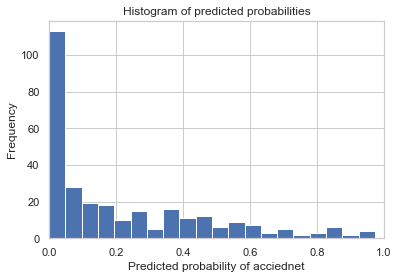

In [75]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=20)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of acciednet')
plt.ylabel('Frequency')

In [76]:
## Changing the cut off value for prediction
pred_proba_df = pd.DataFrame(classifier.predict_proba(X_test))
threshold_list = [0.02,0.03,0.04,0.05,0.06,0.07,0.2,0.25,0.30,0.42,0.43,0.45,0.5,0.6,0.65,0.66,0.67,0.68,0.69,0.7,0.71,0.72,0.73,0.74,0.75]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = metrics.accuracy_score(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1))
    print('Our testing accuracy is {:.2f}'.format(test_accuracy))

    print(confusion_matrix(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1)))


******** For i = 0.02 ******
Our testing accuracy is 0.40
[[ 80 171]
 [  4  39]]

******** For i = 0.03 ******
Our testing accuracy is 0.43
[[ 89 162]
 [  5  38]]

******** For i = 0.04 ******
Our testing accuracy is 0.45
[[ 97 154]
 [  7  36]]

******** For i = 0.05 ******
Our testing accuracy is 0.48
[[107 144]
 [  8  35]]

******** For i = 0.06 ******
Our testing accuracy is 0.50
[[111 140]
 [  8  35]]

******** For i = 0.07 ******
Our testing accuracy is 0.50
[[113 138]
 [  8  35]]

******** For i = 0.2 ******
Our testing accuracy is 0.68
[[168  83]
 [ 10  33]]

******** For i = 0.25 ******
Our testing accuracy is 0.72
[[180  71]
 [ 10  33]]

******** For i = 0.3 ******
Our testing accuracy is 0.76
[[192  59]
 [ 13  30]]

******** For i = 0.42 ******
Our testing accuracy is 0.82
[[215  36]
 [ 16  27]]

******** For i = 0.43 ******
Our testing accuracy is 0.82
[[216  35]
 [ 17  26]]

******** For i = 0.45 ******
Our testing accuracy is 0.82
[[219  32]
 [ 21  22]]

******** For i = 

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


[[226  25]
 [ 23  20]]

******** For i = 0.6 ******
Our testing accuracy is 0.86
[[238  13]
 [ 27  16]]

******** For i = 0.65 ******
Our testing accuracy is 0.86
[[240  11]
 [ 29  14]]

******** For i = 0.66 ******
Our testing accuracy is 0.87
[[241  10]
 [ 29  14]]

******** For i = 0.67 ******
Our testing accuracy is 0.86
[[241  10]
 [ 30  13]]

******** For i = 0.68 ******
Our testing accuracy is 0.87
[[242   9]
 [ 30  13]]

******** For i = 0.69 ******
Our testing accuracy is 0.87
[[243   8]
 [ 30  13]]

******** For i = 0.7 ******
Our testing accuracy is 0.87
[[243   8]
 [ 30  13]]

******** For i = 0.71 ******
Our testing accuracy is 0.87
[[244   7]
 [ 30  13]]

******** For i = 0.72 ******
Our testing accuracy is 0.87
[[244   7]
 [ 31  12]]

******** For i = 0.73 ******
Our testing accuracy is 0.86
[[244   7]
 [ 33  10]]

******** For i = 0.74 ******
Our testing accuracy is 0.87
[[245   6]
 [ 33  10]]

******** For i = 0.75 ******
Our testing accuracy is 0.87
[[246   5]
 [ 33  

In [77]:
y_scores = classifier.predict_proba(X_test)[:, 1]

In [78]:
p, r, thresholds = precision_recall_curve(y_test, y_scores)

In [79]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))

In [80]:
precision_recall_threshold(p, r, thresholds, 0.5)

     pred_neg  pred_pos
neg       226        25
pos        23        20


In [81]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

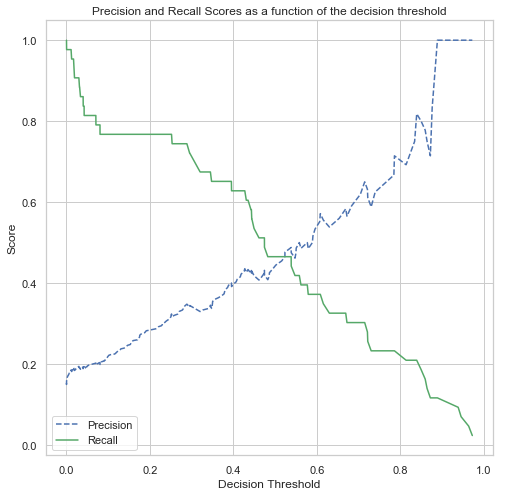

In [82]:
# use the same p, r, thresholds that were previously calculated
plot_precision_recall_vs_threshold(p, r, thresholds)

In [94]:
precision_recall_threshold(p, r, thresholds, 0.53)

     pred_neg  pred_pos
neg       230        21
pos        23        20


In [84]:
print("for Gaussian",accuracy_score(y_test, y_pred_g))

for Gaussian 0.8367346938775511


In [85]:
y_pred_prob.shape

(294,)

In [86]:
X_test.shape

(294, 22)

In [87]:
X_test['att_prob']=y_pred_prob*100

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [88]:
X_test.head()

Age BusinessTravel Department  DistanceFromHome EducationField  \
325    31              1          1                 7              1   
1165   44              1          0                 1              0   
1153   18              1          2                 3              3   
1403   39              2          2                15              2   
1019   36              2          2                16              2   

     EnvironmentSatisfaction Gender JobLevel JobRole JobSatisfaction  ...  \
325                        3      0        3       8               3  ...   
1165                       1      1        2       0               4  ...   
1153                       2      0        1       5               4  ...   
1403                       2      1        4       4               1  ...   
1019                       3      0        2       4               1  ...   

     PercentSalaryHike  PerformanceRating RelationshipSatisfaction  \
325                 24                  4                        1   
1165                11                  3                        3   
1153                12                  3                        3   
1403                12                  3                        1   
1019                13                  3                        1   

      StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  \
325                  1                 10                     2   
1165                 0                 14                     3   
1153                 0                  0                     2   
1403                 0                 21                     3   
1019                 2                 11                     3   

     WorkLifeBalance  YearsSinceLastPromotion YearsWithCurrManager   att_prob  
325                3                        8                    9   0.370938  
1165               3                        0                    2  39.579041  
1153               4                        0                    0  94.617886  
1403               3                       11                   10   0.191107  
1019               2                        0                    2  27.804973  

[5 rows x 23 columns]

## Recomendation

 * WorkLifeBalance
 * RelationshipSatisfaction
 * PercentSalaryHike
 * MonthlyIncome
 * JobSatisfaction
 * JobLevel
 * EnvironmentSatisfaction

* **Attrition seems to be more prevalent in the early career stages, most notably between the ages of 20 and 30**

* **Whilst there is records of attrition at almost every age grouping, it would be beneficial to retain these younger employees and develop them within the business.**

* **preventing attrition, by offering incentives in the form of pay increases, how much of an effect, if any, would this have on the employee’s attrition chance**

* **Employees that worked overtime had a much higher rate of attrition than their colleagues**

* **minimising overtime hours, employee satisfaction could increase and the chance of attrition could go down for this specific group of employees**